In [1]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# A text analysis for comments of video channels

## Exploratory analysis for general information
### Time seires 
#### Year trend with video count
#### Year trend with video views
### Prevalence: what are the most viewed channels
### Persistence: what are the most active channels
### Words frequency and Word cloud
## Topic Modeling - LDA
### Video Level
#### Top 5 models in video level
#### Classify evevry video into 5 topics 
#### Compare video-level perforemance with each topic
### Channel Level
#### Top 5 models
#### Classify evevry channel into 5 topics 
#### Compare channel-level perforemance with each topic
### Optimize the model - Choosing Optimal LDA Model
## Sentiment Analysis
### Sentiment analysis with SnowNLP
#### Predict comments sentiment in video - level
#### Predict comments sentiment in channel - level
#### Correlaion analysis between sentiment and views in video - level
#### Correlaion analysis between sentiment and views in video - level
### Sentiment analysis with Model training: RNN-Embedding-BiLSTM-LSTM
### Compare performance with SnowNLP and LSTM
## Insights and recommendations
## Next step

In [242]:
import re
import nltk
import jieba
import string
import opencc
import wordcloud
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from pyecharts import Pie
import matplotlib.pyplot as plt
from scipy.misc import imread 
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, ImageColorGenerator,STOPWORDS

In [3]:
df1 = pd.read_excel('csrp data science challenge.xlsx', index_col=0,sheet_name=0)

In [4]:
df2 = pd.read_excel('csrp data science challenge.xlsx', index_col=0,sheet_name=1)

In [5]:
df1 = df1.reset_index()

In [6]:
df1.head()

,commentText,updatedAt,videoId
0,一口就吃掉一千元，，这谁吃的起啊,2016-02-17 18:26:21,UvWOfjiXQiU
1,我試試,2016-12-22 21:33:05,w_VJAynyxAw
2,原來你跟我一樣,2016-02-24 00:55:01,DxforOx--9Q
3,链接链接吧的人员来,2016-02-06 10:25:05,-foZ5RcCm8U
4,这个力度，沉凝内敛，是真功夫,2016-12-18 15:29:14,_IbK0X3Qi3I


In [7]:
df1['videoId'].value_counts()

-foZ5RcCm8U    91
qoRdsyxZJzg    38
-S8V29TvZ7Y    34
JAHh85Qgv88    32
pTrELxQ3dbw    31
1hdkpGi3oPo    26
8uhvP8ryU1I    23
2Ftfz3OeBP0    19
gHOHfolpmV8    19
Ir_sbO4x6i0    18
2bMiVjjrKOI    18
whqGyTPyFrU    18
9xQ_7HQkee0    17
GHqXCf2ej_g    17
x1meOvD9fAc    17
tx1c8QRlaHk    17
FAz5ScuHhJs    17
2wEpPCtiZ8M    17
u2oP2VWZOy0    16
N2AxoCM9ZaI    15
wvnAFrvr3xc    15
nkKLZTomkhU    15
0kDwDSJRNOQ    15
GDhBVvd1rlE    15
LhZxDtm_MTo    15
6nzITiOJhgs    15
ccIOL4ViA5U    14
gFyjBokezNU    14
U8ItusnFzIU    14
qX7poSHqsWk    14
               ..
Jzs0i9gbtF8     1
PB4aDgdXs9g     1
7-zUGSDpoxk     1
9xIRFttBALc     1
QTvU56_J2hw     1
PYX-wCbTI4M     1
YRt_0Ltee4g     1
IglEs5S0XJk     1
Hlwqe6exBuw     1
pq0SGtD1Hk0     1
dqMSLEetp7g     1
z6GLoPPDD7o     1
pqDAa53FQU8     1
iSH6JkaATF4     1
3y6KHRipafQ     1
VMlgBCEZNmY     1
X7xWw0RxJgg     1
MEu6LJDfiWw     1
W8vTAgXsjZA     1
cFozQF0sW2I     1
6qkwKkVUU8s     1
bArq62lvnVg     1
biNFXRMnWKE     1
FqTWqJaGaZI     1
vQpOWNYAsg

In [8]:
df2 = df2.reset_index()

In [9]:
df2.head()

,channelTitle,publishedAt,title,videoId,viewCount
0,時空咖啡館 timecoolfree,2016-04-01 00:03:18,格羅茲尼 第三十公里:「自殺」A,YKTfi7pZw-s,33065.0
1,時空咖啡館 timecoolfree,2016-04-01 00:03:17,格羅茲尼 第三十公里:「自殺」D,hS2PScKwneA,15126.0
2,護田〉:3),2012-01-28 14:34:10,自殺音樂劇 (中文字幕 by 護田),FanBTishaug,50504.0
3,東森新聞 CH51,2016-04-21 16:19:02,最新》女中尉婚前疑自殺 家屬悲痛赴殯儀館,wBegQdyxDwc,2929.0
4,風珀,2016-09-30 16:32:53,[minecraft] 30種作死的方式 EP1 想死也沒那麼容易,91K-fvRju1E,5893.0


## Exploratory analysis for general information

### Time series

In [10]:
df2

,channelTitle,publishedAt,title,videoId,viewCount
0,時空咖啡館 timecoolfree,2016-04-01 00:03:18,格羅茲尼 第三十公里:「自殺」A,YKTfi7pZw-s,33065.0
1,時空咖啡館 timecoolfree,2016-04-01 00:03:17,格羅茲尼 第三十公里:「自殺」D,hS2PScKwneA,15126.0
2,護田〉:3),2012-01-28 14:34:10,自殺音樂劇 (中文字幕 by 護田),FanBTishaug,50504.0
3,東森新聞 CH51,2016-04-21 16:19:02,最新》女中尉婚前疑自殺 家屬悲痛赴殯儀館,wBegQdyxDwc,2929.0
4,風珀,2016-09-30 16:32:53,[minecraft] 30種作死的方式 EP1 想死也沒那麼容易,91K-fvRju1E,5893.0
5,影子Shadow,2016-07-25 13:13:15,鹽與聖所 Part 13 [讓我想死的心都有的-雙子幽靈],zFrAKU_bfEE,748.0
6,God Tone Asia 張家兄弟滑起來,2016-06-07 00:33:03,【統神】帳號被鎖不想活 每天都活在恐懼中 2016/06/06,OH6DPLZmeEo,11749.0
7,zass 17,2015-05-07 21:36:32,自殺小隊造型全揭露、片場影片流出 - Machinima報導 20150506,Vmdk0-LVelY,135132.0
8,TomoNews 台灣,2012-04-21 04:07:31,「誰攔就一起死」 男砍同事10多刀割臉削耳 2012.04.21,mMln29832lM,151978.0
9,Killer Steal,2016-12-27 06:37:32,KillerSteal: 结伴同行一齊死裏逃生？？ [不純潔無節操] 作死Fire #3,596dkCkUlno,46.0


In [11]:
df2['video_count'] = 1

In [12]:
df_t1 = df2.set_index('publishedAt').resample('1y').aggregate({'video_count':'sum'}).reset_index()
df_t1

,publishedAt,video_count
0,2006-12-31,10
1,2007-12-31,14
2,2008-12-31,26
3,2009-12-31,58
4,2010-12-31,78
5,2011-12-31,149
6,2012-12-31,172
7,2013-12-31,271
8,2014-12-31,375
9,2015-12-31,533


In [13]:
from pyecharts import Line

attr = df_t1['publishedAt']
value = df_t1['video_count']
line = Line()
line.add(
    "Year trend with the video count",
    [str(y)[:10] for y in attr],
    value,
    mark_point=["max", "min"],
    mark_line=["average"],
)
line.render('Year trend with video count.html')

#### Year trend with video count

We can see that the videos in ceah year in the dataset are increasing and most of them are from 2016

In [14]:
from IPython.display import IFrame
IFrame('Year trend with video count.html',800,400)

In [15]:
df_t2 = df2.set_index('publishedAt').resample('1y').aggregate({'viewCount':'sum'}).reset_index()
df_t2

,publishedAt,viewCount
0,2006-12-31,9196191.0
1,2007-12-31,10783061.0
2,2008-12-31,7530550.0
3,2009-12-31,13452802.0
4,2010-12-31,13666077.0
5,2011-12-31,24447190.0
6,2012-12-31,29017882.0
7,2013-12-31,29492452.0
8,2014-12-31,41990180.0
9,2015-12-31,41348363.0


#### Year trend with video views

From this chart, we can see that the whole views are keeping the similar incresing pace with the video numbers, which may be a sign that people are watching more and more videos

In [16]:
attr = df_t2['publishedAt']
value = df_t2['viewCount']
line = Line()
line.add(
    "Year trend with video views",
    [str(y)[:10] for y in attr],
    value,
    mark_point=["max", "min"],
    mark_line=["average"],
)
line.render('Year trend with video views.html')
IFrame('Year trend with video views.html',800,400)

### what are the most viewed channels
I filter out the top 20 viewed channels, and found out that most of channels has less than 5 videos, which means that the most viewed channel are not winning by the quantity but others, like content itself.

In [17]:
df3 = df2.pivot_table(index=['channelTitle'],values='viewCount',aggfunc='sum').reset_index()
df3 = df3.sort_values(by='viewCount',ascending=False)[:20]
df3

,channelTitle,viewCount
87,Blippi,67869205.0
1366,杰威爾音樂 JVR Music,17358848.0
36,ACfeel,7851112.0
1487,石涛TV,7778571.0
727,cosbystudio,6003258.0
960,summerfl7,4909182.0
1134,劉瀚文,4127160.0
944,shichwan,3855478.0
786,hmvDigitalChinaGroup,3782191.0
536,Sk Chung,3327336.0


In [18]:
from pyecharts import Bar

attr = df3['channelTitle']
v = df3['viewCount']
bar = Bar("Most viewed channels")
bar.add("Most viewed channels", attr, v,is_label_show=False)
bar.render('Most viewed channels.html')

In [19]:
IFrame('Most viewed channels.html',800,420)
#you can click on table or labels

In [20]:
df4 = df2.sort_values(by='viewCount',ascending=False)[:10]
df4

,channelTitle,publishedAt,title,videoId,viewCount,video_count
3296,Blippi,2016-05-22 16:30:24,Learn The Alphabet With Blippi | ABC Letter Boxes,67JzSRnyXr4,67869205.0,1
419,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",RPWDeLqsN0g,13873838.0,1
313,ACfeel,2007-03-23 13:24:51,"短短50秒,竟如此感人!",dTn2iurL2cE,7851112.0,1
1530,cosbystudio,2006-05-13 13:23:41,聽 海,ooqDc0Ig174,6003258.0,1
1121,summerfl7,2015-02-02 20:31:28,牽絲戲 by 銀臨 & Aki阿杰 QIAN SI XI,C6YobfNjeqc,4909182.0,1
183,劉瀚文,2014-09-13 21:05:45,酒矸倘賣無：這首歌來自於一個情節的感人故事：,AAWfPJXYoTo,4127160.0,1
330,杰威爾音樂 JVR Music,2010-09-10 18:08:00,周杰倫 Jay Chou【雨下一整晚 Rain All Night】Official MV,jOxzAsnx9-0,3485010.0,1
957,Sk Chung,2014-12-27 16:40:50,新馬師曾 粵曲串燒,jXuc90xKqIg,3327336.0,1
987,hmvDigitalChinaGroup,2015-11-07 04:20:45,《十月初五的月光》電影版MV - 張智霖《祝君好》,k_NcPR-8BF0,3044537.0,1
1980,Apple Jai,2014-06-20 21:33:54,買雪糕時不要分心。,hopIeKMYtV8,2838388.0,1


In [21]:
df5 = df2.pivot_table(index=['channelTitle'],values='videoId',aggfunc='count').reset_index()
df5 = df5.sort_values(by='videoId',ascending=False)[:20]
df5

,channelTitle,videoId
1487,石涛TV,219
1590,蘋果動新聞 HK Apple Daily,95
1656,關鍵時刻,71
870,memehongkong,68
1368,東森新聞 CH51,59
1078,中国江西网络广播电视台 China Jiangxi Radio and Television...,37
567,TVBS NEWS,31
1156,台灣蘋果日報,25
1256,幻燄牙月,24
1087,中時電子報,24


In [22]:
dft = df2.pivot_table(index=['channelTitle'],values='videoId',aggfunc='count').reset_index().sort_values(by='videoId',ascending=False)

In [23]:
dft[dft['channelTitle'] == 'Sk Chung']

,channelTitle,videoId
536,Sk Chung,1


### what are the most active channels
The most active channels are basically all from news or news reviews channel, even though they process a lot of videos, but only theree of them make to the list of top viewed channels 

In [24]:
attr = df5['channelTitle']
v = df5['videoId']
pie = Pie()
pie.add("channel layout", attr, v, is_label_show=False,center = [70,60],legend_orient="vertical",legend_pos="left")
pie.render('channel layout.html')

In [25]:
IFrame('channel layout.html',800,420)
#you can click on table or labels

### Words frequency and word cloud

#### Merge two table into one

In [26]:
df = pd.merge(df1,df2,on=['videoId'],how='left')

This is how this dataset like

In [27]:
df.head()

,commentText,updatedAt,videoId,channelTitle,publishedAt,title,viewCount,video_count
0,一口就吃掉一千元，，这谁吃的起啊,2016-02-17 18:26:21,UvWOfjiXQiU,NeoKing5168,2010-09-26 01:07:19,非凡大探索_美食大學堂_鮑魚教父雙雄,23272.0,1.0
1,我試試,2016-12-22 21:33:05,w_VJAynyxAw,徐聖傑,2010-10-18 18:03:18,菜鳥挑戰毒氣室2,438.0,1.0
2,原來你跟我一樣,2016-02-24 00:55:01,DxforOx--9Q,Pumpkin Jenn,2015-04-12 20:35:23,🎃 包包大解拆 What's in My Bag | Pumpkin Jenn🎃,182411.0,1.0
3,链接链接吧的人员来,2016-02-06 10:25:05,-foZ5RcCm8U,China History,2015-02-02 00:56:04,中国历史地图 Historical Atlas of China,995311.0,1.0
4,这个力度，沉凝内敛，是真功夫,2016-12-18 15:29:14,_IbK0X3Qi3I,zxmsf,2009-03-18 19:39:57,书坛耆宿-胡铁生,1634.0,1.0


In [28]:
df=df.sort_values(['viewCount','publishedAt'],ascending=[False,False])
df

,commentText,updatedAt,videoId,channelTitle,publishedAt,title,viewCount,video_count
6914,我們要求,2016-06-06 23:19:13,67JzSRnyXr4,Blippi,2016-05-22 16:30:24,Learn The Alphabet With Blippi | ABC Letter Boxes,67869205.0,1.0
683,陳怡蓉以前好清新脫，現在變得好俗、土土的,2016-04-24 13:34:55,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
1084,十多年前，當初所聽到的第一首Jay的歌便是這首,2016-01-23 11:19:52,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
1285,別把大家當白癡 周神偷,2016-04-23 03:22:00,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
1448,被捲到火星還是要聽,2016-04-27 07:14:09,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
2431,龍捲風 那天是我生日唷 周董,2016-04-23 03:20:28,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
2532,爱情来得太快是不是发的顺丰？,2016-06-17 06:56:05,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
2737,一辈子没见过龙卷风,2016-05-14 13:05:16,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
3723,這曲應該是英文歌,2016-04-23 03:14:36,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
4850,經典的第一張專輯,2016-01-18 20:34:23,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0


#### Analyzing Process
* Words segmentation with jieba
* Remove stopwords and modify stopwords
* Change all the simple chinese to hk-traditional
* Replace synonym, like 中共、共匪、共产党 to 共产党
* Add local words into jieba library, like 蔡英文、习近平、一带一路...

In [29]:
#convert words to hong kong traditional 
cc = opencc.OpenCC('s2hk')
def to_hk(text):
    return cc.convert(text)
text = df['commentText'].apply(to_hk).to_string()

def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 
stopwords = stopwordslist('Chinese_Stopwords.txt')
#i add several words we discussed into stopwords
#you can find them in top of the Chinese_Stopwords.txt

In [30]:
#build local words
jieba.add_word('習近平')
jieba.add_word('一首歌')
jieba.add_word('中華民國')
jieba.add_word('習主席')
jieba.add_word('一帶一路')
jieba.add_word('洗腦')
jieba.add_word('蔡英文')
#cut text
def text_cut(text):  
    return [w for w in jieba.cut(text) if w not in stopwords and len(w)>1] 

#if you got error "ImageColorGenerator is smaller than the canvas"
#please go back to last cell to adjust max_font_size= ??? & max_words=???
#usually reduce the value will work

textcut = text_cut(text)
mapping={
    '中共':'共產黨',
    '濤哥':'石濤',
    '共匪':'共產黨'
}
def cleaning(e):
    return mapping.get(e,e)

text_clean = []
for t in textcut:
    t = cleaning(t)
    text_clean.append(t)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/wl/5125h54j1b5_9l3s63fcykx40000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/wl/5125h54j1b5_9l3s63fcykx40000gn/T/jieba.cache
Loading model cost 1.048 seconds.
DEBUG:jieba:Loading model cost 1.048 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


In [31]:
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import plotly
def word_count_top_20(textcut):
    word_count = pd.Series(textcut).value_counts().sort_values(ascending=False)[0:20]
    plotly.offline.init_notebook_mode(connected=True)

    data = [go.Bar(
                x=word_count.index.tolist(),
                y=word_count.values.tolist(),
                marker=dict(
            color='rgba(185,20,10,0.8)'
        ) 
        )]
    layout = go.Layout(
        title='Top words',
    )

    fig = go.Figure(data=data, layout=layout)
    plot(fig, filename='Top words')
    return 

In [32]:
#generate word_tag
def word_tag(textcut):
    image = Image.open(r'newspaper.png')
    graph = np.array(image)
    wc = WordCloud(font_path=r"simhei.ttf",mode='RGBA',background_color=None,max_font_size=200,mask=graph,collocations=False,max_words=200)
    wc.generate(' '.join(textcut))
    img = imread('color.png')  
    cloud_colors = wordcloud.ImageColorGenerator(np.array(img))  
    wc.recolor(color_func=cloud_colors) 
    wc.to_file(r"word cloud.png") 
    plt.figure(figsize=(12,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word cloud', loc='Center', fontsize=20)
    plt.show()
    return plt.show()

After the processing mentioned above, the following are the words with top frequency. We can see that the most of them are political related and others are people's attituce about the shows and celebrity. 

In [33]:
word_count_top_20(text_clean)
IFrame('Top words.html',800,400)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/plotly/offline/offline.py:459: UserWarning:

Your filename `Top words` didn't end with .html. Adding .html to the end of your file.



/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/scipy/misc/pilutil.py:165: DeprecationWarning:

`fromimage` is deprecated!
`fromimage` is deprecated in SciPy 1.0.0. and will be removed in 1.2.0.
Use ``np.asarray(im)`` instead.



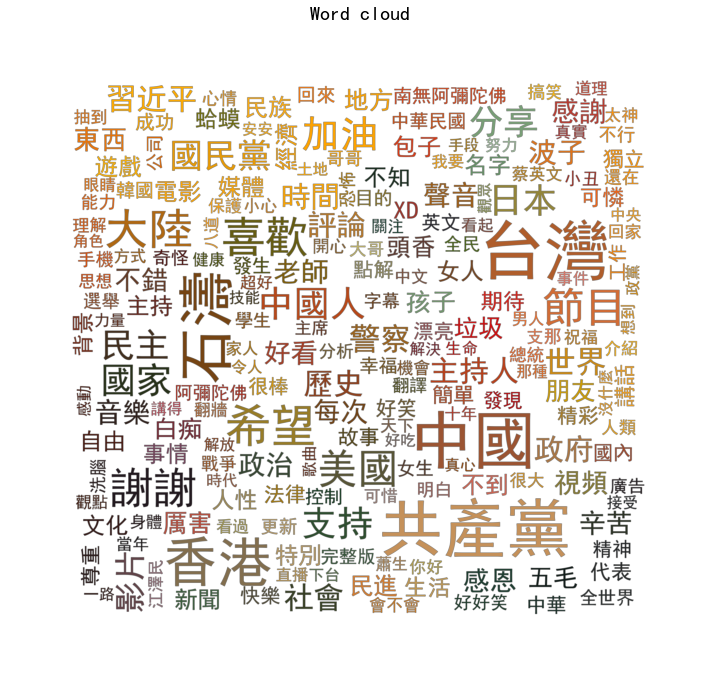

In [243]:
word_tag(text_clean)

## topic modeling
From above merged dataset, we can know that the structure of the dataset contains **"Channel - Video - Comment"** 3 layers, and there are 1757 channels, 3545 videos and 7000 comments. Therefore, we might need to choose which level to do topic modeling. Considering that some comments are only one or two words, the results will not be good if using **Comment** level. I Decide to use Video level and Channel level, and do a comparasion with those two methods.

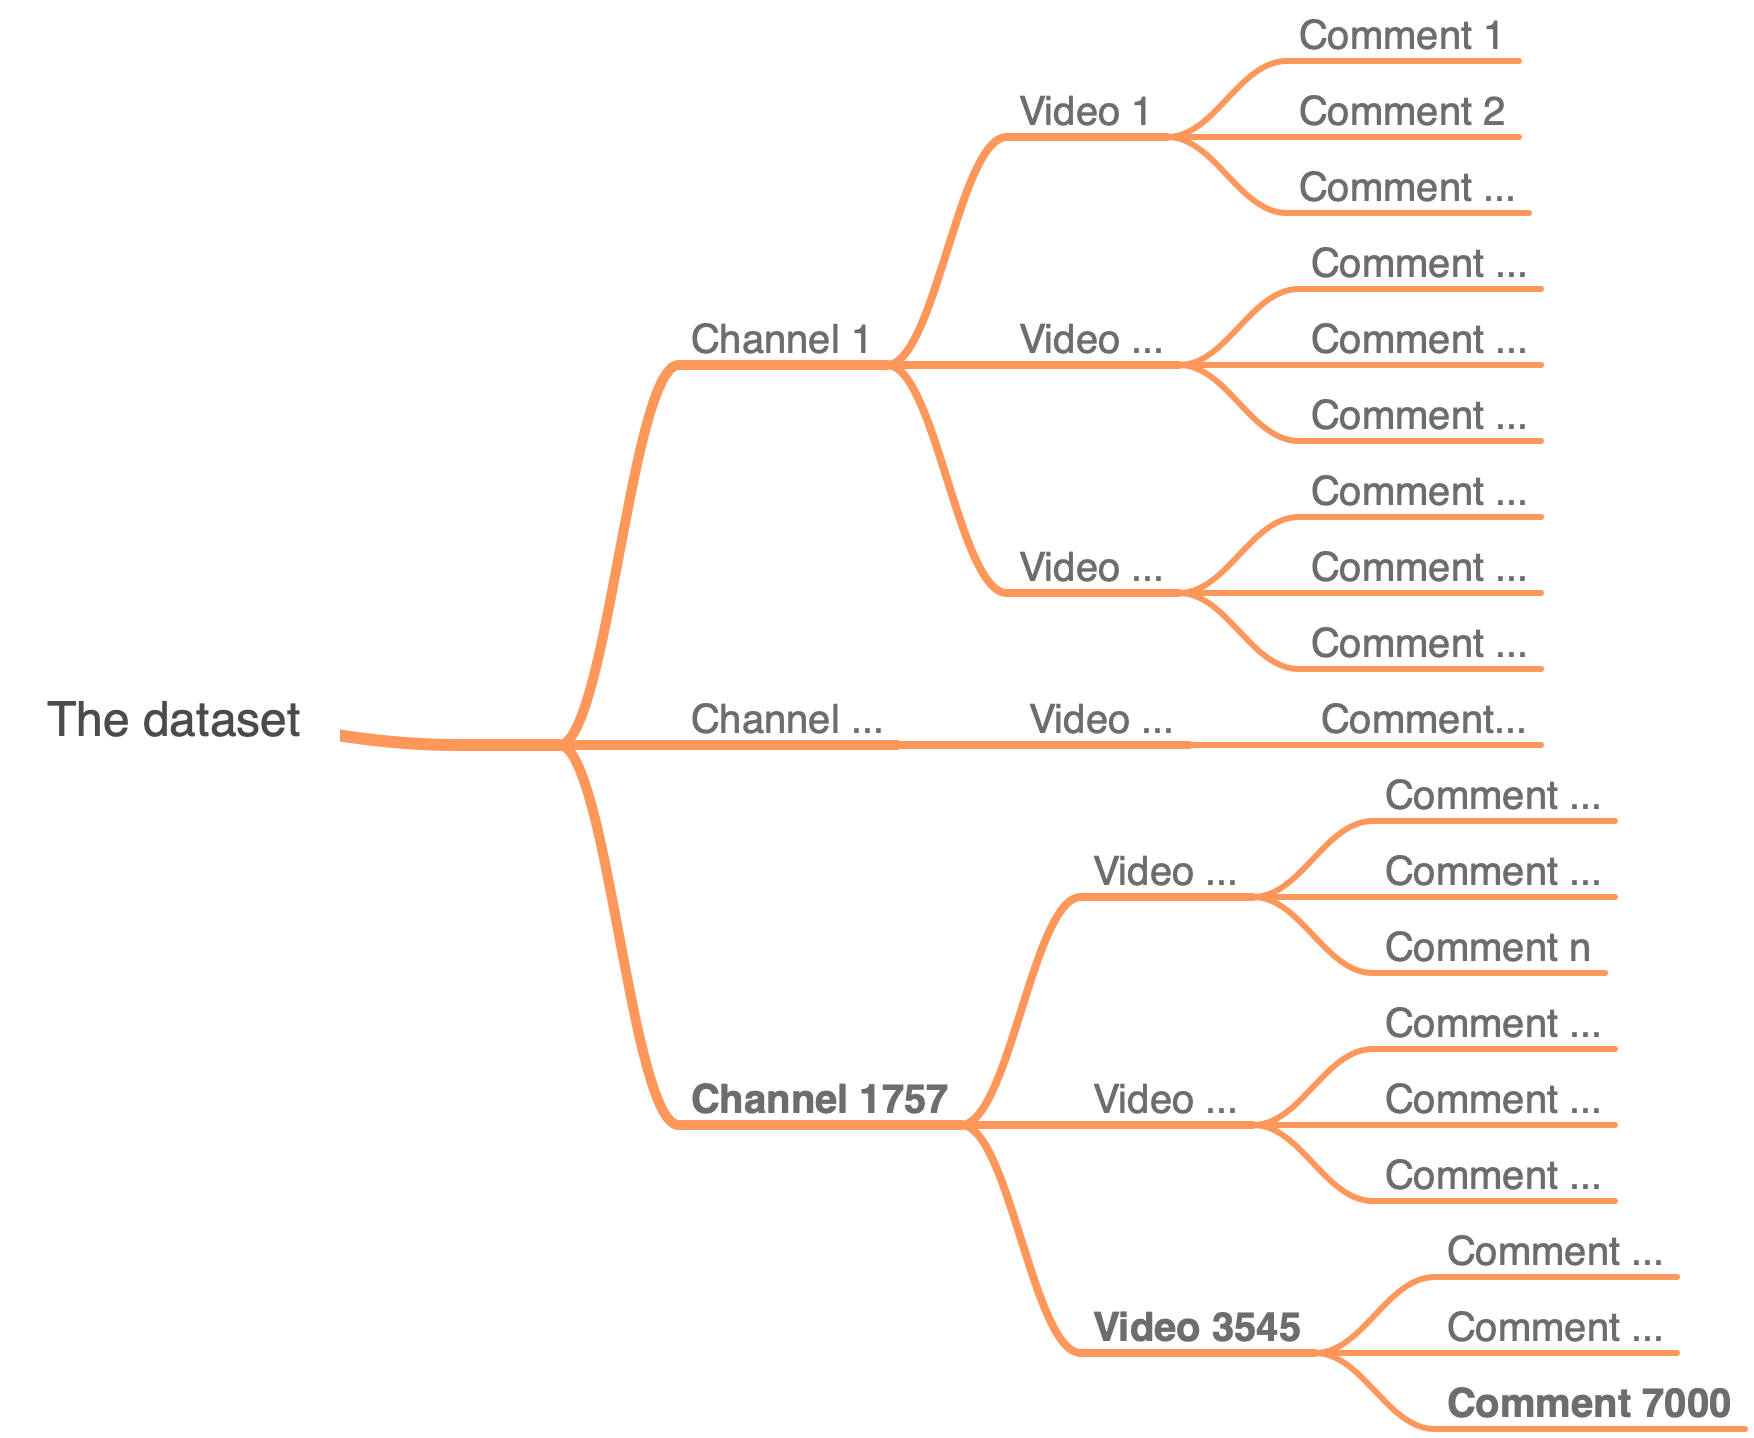

In [35]:
from IPython.display import Image
Image("The dataset.png",width=600, height=600)

In [162]:
import pandas as pd
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [163]:
df.head()

,commentText,updatedAt,videoId,channelTitle,publishedAt,title,viewCount,video_count
6914,我們要求,2016-06-06 23:19:13,67JzSRnyXr4,Blippi,2016-05-22 16:30:24,Learn The Alphabet With Blippi | ABC Letter Boxes,67869205.0,1.0
683,陳怡蓉以前好清新脫，現在變得好俗、土土的,2016-04-24 13:34:55,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
1084,十多年前，當初所聽到的第一首Jay的歌便是這首,2016-01-23 11:19:52,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
1285,別把大家當白癡 周神偷,2016-04-23 03:22:00,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0
1448,被捲到火星還是要聽,2016-04-27 07:14:09,RPWDeLqsN0g,杰威爾音樂 JVR Music,2012-09-14 17:49:08,"周杰倫【龍捲風 官方完整MV】Jay Chou ""Tornado"" MV (Long-Jua...",13873838.0,1.0


In [164]:
df['videoId'].value_counts()

-foZ5RcCm8U    91
qoRdsyxZJzg    38
-S8V29TvZ7Y    34
JAHh85Qgv88    32
pTrELxQ3dbw    31
1hdkpGi3oPo    26
8uhvP8ryU1I    23
2Ftfz3OeBP0    19
gHOHfolpmV8    19
whqGyTPyFrU    18
2bMiVjjrKOI    18
Ir_sbO4x6i0    18
GHqXCf2ej_g    17
tx1c8QRlaHk    17
9xQ_7HQkee0    17
x1meOvD9fAc    17
FAz5ScuHhJs    17
2wEpPCtiZ8M    17
u2oP2VWZOy0    16
6nzITiOJhgs    15
wvnAFrvr3xc    15
GDhBVvd1rlE    15
N2AxoCM9ZaI    15
LhZxDtm_MTo    15
0kDwDSJRNOQ    15
nkKLZTomkhU    15
U8ItusnFzIU    14
rAcwP_v_5Ug    14
ccIOL4ViA5U    14
qX7poSHqsWk    14
               ..
YRt_0Ltee4g     1
gEbG4fPHCVU     1
BbfwypwQ3W4     1
uYjchMWtDGM     1
tJQwSkdnf58     1
iyLup7O43qo     1
pwOhsBoQLc8     1
oqubB_ezUEM     1
kH_xDPASLek     1
8xuC_dN7eEM     1
FqTWqJaGaZI     1
3y6KHRipafQ     1
X7xWw0RxJgg     1
MEu6LJDfiWw     1
W8vTAgXsjZA     1
dqMSLEetp7g     1
cFozQF0sW2I     1
bArq62lvnVg     1
biNFXRMnWKE     1
vQpOWNYAsgk     1
gsALwGuL11A     1
BuKTN6qZMdY     1
AxUsKEUHTzg     1
OqZaBCGTces     1
6qkwKkVUU8

### Video level

In [186]:
df_v = df.groupby('videoId').aggregate({'commentText':'sum', 'viewCount':'sum'}).reset_index()
df_v

,videoId,commentText,viewCount
0,-0DECBlauZU,多謝無私分享很不錯的文章，花時間細細品嚐～感恩分享喔＾＾愛美就要現在開始好好保養，不要亂吃，...,380560.0
1,-0R-KW_zWmE,超假,47324.0
2,-1-V7GQusJc,笑死人了連名字都不願意改還說有誠意要改革，繼續巴著中國那兩個字就滾回中國吧慢走不送。去你的李...,1088919.0
3,-1g5nzMmFrA,哪个游行呀，给个链接涛哥回归了！说得好 中华名族复苏胜过一切我不是什么五毛，我也讨厌共产党，...,492852.0
4,-4KgDDxIqB4,為什麼我都分不太出來他們兩個的聲音....,25273.0
5,-53xAzBADTc,都放什么进去，放多少量，怎么没声音，也没有文字说明。,77604.0
6,-5IhSgtTZHg,"呢個林鄭又係另一個自認超然永不認錯的人,我從來都不認為這個翻辦江青的處事方法,她只是另一個梁振英",910.0
7,-5b_6zTACLE,讚,53116.0
8,-96ZCf38ovM,今天又來一次了,28152.0
9,-9OPVd11ns8,讚,4294.0


In [187]:
#cut word
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

#set up stopwords
def stopwordslist(filepath):  
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]  
    return stopwords 
stopwords = stopwordslist('Chinese_Stopwords.txt')

In [188]:
df_v["content_cutted"] = df_v.commentText.apply(to_hk)
df_v["content_cutted"] = df_v.content_cutted.apply(chinese_word_cut)
df_v["content_cutted"] = df_v["content_cutted"].apply(cleaning)

In [189]:
df_v["content_cutted"]

0       多謝 無私 分享 很不錯 的 文章 ， 花時間 細細 品嚐 ～ 感恩 分享 喔 ＾ ＾ 愛美...
1                                                      超假
2       笑死人 了連 名字 都 不願 意改 還 説 有 誠 意 要 改革 ， 繼續 巴著 中國 那 ...
3       哪個 遊行 呀 ， 給個 鏈 接濤 哥 迴 歸 了 ！ 説 得 好   中華名族 復 甦 勝...
4                         為 什麼 我 都 分不太出 來 他們 兩個 的 聲音 ....
5              都 放什麼 進去 ， 放多 少量 ， 怎麼 沒聲音 ， 也 沒 有 文字 説 明 。
6       呢 個 林 鄭 又 係 另 一個 自認 超然 永不 認錯 的 人 , 我 從 來 都 不 認...
7                                                       讚
8                                             今天 又 來 一次 了
9                                                       讚
10                      一張紙   你們 也 可以 拿 去 加熱 真是 低能 過頭 了 啊
11      唔 識 就 咪 亂 話 ， 霸王 下跌 關大陸 經濟 放緩 Q 事 咩 ， 唔 同經濟 放緩...
12      現在 改版 我 有 一點 傷心 因為現 在 改 的 卡特 輸出 變慢 而且 也 是 我 在 ...
13                                加 這麼 多冰塊 ! 這樣 也 能 喝 出什味
14      為 什麼 那個 年代 的 青少年 都 長 成 那樣 = =   這已 經不僅僅 是 穿著 問...
15                                我刷 機到 一半 當機     要 怎麼 開機
16      由細 叫 到 大 。 點會 唔 識 叫 呀 。 香港 依家 變成 咁 呀 。 我 叫 我 舅...
17            

In [190]:
# get stopwords
# get vectorized data and prepare for lda model
n_features = 1000
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words= stopwords,
                                max_df = 0.5,
                                min_df = 10)
data_vectorized = tf_vectorizer.fit_transform(df_v.content_cutted)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['5f', 'by', 'lex'] not in stop_words.



In [191]:
data_vectorized

<3545x612 sparse matrix of type '<class 'numpy.int64'>'
	with 12120 stored elements in Compressed Sparse Row format>

In [192]:
#train lda model
n_topics = 5
lda_model = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                evaluate_every = -1,
                                learning_decay=0.5)
# lda_model.fit(tf)
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model) 

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.5,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


The following are the top 5 topic about the aggregation of the comments in **video level**. We can see that:
* Topic 0 is about taiwan and regional issues 
* Topic 1 is about the politics and China
* Topic 2 is about Hong Kong and film
* Topic 3 is about Music and show
* Topic 4 is also about the politics, but in a more nagtive way, you can see people are aruging with each others by the words 包子， 五毛

In [193]:
#get words of the topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]                        
    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

#you can change number of n_top_words
n_top_words = 20
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda_model, tf_feature_names, n_top_words)

Topic #0:
台灣 日本 聲音 白痴 好看 生命 不到 厲害 名字 記者 公司 英文 男生 發現 主持 上海 講話 好笑 更新 可惜
Topic #1:
中國 民主 台灣 政治 大陸 社會 中共 國家 政府 世界 國民黨 自由 歷史 民族 經濟 中國人 地方 共產黨 力量 文化
Topic #2:
香港 加油 影片 垃圾 主持人 每次 東西 時間 故事 分享 視頻 簡單 方法 回來 人生 支那 努力 韓國 網站 有用
Topic #3:
喜歡 希望 警察 老師 支持 孩子 女人 朋友 不錯 音樂 辛苦 男人 幸福 背景 尊重 開心 節目 哥哥 很棒 真心
Topic #4:
謝謝 中共 濤哥 節目 美國 石濤 共匪 中國人 共產黨 包子 不知 五毛 感恩 評論 分享 電影 人性 蛤蟆 感謝 事情



The following are the visualization about the top 5 topics. topic about politics and China is the most dominant one.
* Note that the topic number is not the same as the above. But you can click each circle to see which topic it is
* The area of circle represents the importance of each topic over the entire corpus, the larger the cicle is, the more important this topic is
* The distance between the center of circles indicate the similarity between topics.

In [194]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
ldavis_prepared = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, tf_vectorizer)
pyLDAvis.save_html(ldavis_prepared,'lda topics - video level.html')
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, tf_vectorizer,mds='tsne')

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
1      72.441277  -37.951199       1        1  57.168947
4      -9.300237  -52.581253       2        1  14.854071
3      21.730757    0.611396       3        1  10.264937
0      60.161160  -98.114014       4        1   8.952892
2      -1.617545 -113.681328       5        1   8.759153, topic_info=     Category        Freq Term       Total  loglift  logprob
term                                                        
601   Default  303.000000   香港  303.000000  30.0000  30.0000
136   Default  406.000000   台灣  406.000000  29.0000  29.0000
150   Default  113.000000   喜歡  113.000000  28.0000  28.0000
376   Default  448.000000   民主  448.000000  27.0000  27.0000
30    Default  289.000000   中共  289.000000  26.0000  26.0000
113   Default   86.000000   加油   86.000000  25.0000  25.0000
31    Default  586.000000   中國  586.000000  24.0000  24.0000
531   Default   99.000000   謝謝   99.000000  23.0000  23.0000
398   Default   90.000000   濤哥   90.000000  22.0000  22.0000
333   Default   98.000000   日本   98.000000  21.0000  21.0000
240   Default  144.000000   希望  144.000000  20.0000  20.0000
479   Default  149.000000   美國  149.000000  19.0000  19.0000
533   Default   68.000000   警察   68.000000  18.0000  18.0000
307   Default  110.000000   支持  110.000000  17.0000  17.0000
457   Default  112.000000   節目  112.000000  16.0000  16.0000
443   Default   74.000000   石濤   74.000000  15.0000  15.0000
250   Default   54.000000   影片   54.000000  14.0000  14.0000
485   Default   57.000000   老師   57.000000  13.0000  13.0000
170   Default   54.000000   垃圾   54.000000  12.0000  12.0000
32    Default  141.000000  中國人  141.000000  11.0000  11.0000
100   Default   63.000000   共匪   63.000000  10.0000  10.0000
102   Default  129.000000  共產黨  129.000000   9.0000   9.0000
41    Default   48.000000  主持人   48.000000   8.0000   8.0000
206   Default   50.000000   孩子   50.000000   7.0000   7.0000
374   Default   46.000000   每次   46.000000   6.0000   6.0000
315   Default  211.000000   政治  211.000000   5.0000   5.0000
359   Default   61.000000   東西   61.000000   4.0000   4.0000
190   Default   44.000000   女人   44.000000   3.0000   3.0000
446   Default  202.000000   社會  202.000000   2.0000   2.0000
416   Default   44.000000   生命   44.000000   1.0000   1.0000
...       ...         ...  ...         ...      ...      ...
436    Topic5   18.778709   看過   19.574675   2.3936  -4.4564
170    Topic5   51.818490   垃圾   54.376170   2.3869  -3.4414
423    Topic5   15.521813   留言   16.311764   2.3854  -4.6469
494    Topic5   15.303893   自以   16.084537   2.3853  -4.6610
540    Topic5   15.060480   超好   15.831587   2.3851  -4.6771
62     Topic5   14.362112   介紹   15.137069   2.3825  -4.7246
25     Topic5   14.512120   不見   15.296521   2.3824  -4.7142
204    Topic5   13.582668   媽媽   14.360145   2.3794  -4.7804
80     Topic5   13.879975   做好   14.692765   2.3782  -4.7587
588    Topic5   12.987632   難過   13.766572   2.3768  -4.8252
571    Topic5   12.439027   還好   13.212579   2.3747  -4.8683
195    Topic5   11.930108   好吃   12.697546   2.3727  -4.9101
486    Topic5   11.906359   老母   12.675686   2.3725  -4.9121
509    Topic5   11.417532   表情   12.197815   2.3690  -4.9540
435    Topic5   11.136646   看起   11.910745   2.3679  -4.9789
541    Topic5   10.989354   超級   11.767603   2.3666  -4.9922
237    Topic5   10.784248   工資   11.559979   2.3656  -5.0111
311    Topic5   10.899710   攻擊   11.685951   2.3654  -5.0004
489    Topic5   10.748100   聽到   11.527801   2.3650  -5.0144
318    Topic5   27.052628   故事   35.845061   2.1536  -4.0914
475    Topic5   18.980319   網站   24.362383   2.1854  -4.4458
514    Topic5   26.121154   視頻   38.468182   2.0480  -4.1264
359    Topic5   34.206076   東西   61.907680   1.8418  -3.8568
114    Topic5   19.732390   努力   28.952539   2.0517  -4.4069
339    Topic5   33.198208   時間   75.972939   1.6072  -3.8867
458    Topic5   24.4

In [195]:
topic=[]
for i in range(len(lda_output)):
    t = dict((k,lda_output[i][k]) for k in range(len(lda_output[i])))
    topic_id = sorted(t.items(),key= lambda x: x[1], reverse=True) # Take the topic with the highest probability as the subject of the text
    if topic_id[0][1] == 0.2:
        topic_id = 'neither,the comments is too short'
    else:
        topic_id = topic_id[0][0]
    topic.append(topic_id)

In [196]:
lda_output[0]

array([0.01217483, 0.01178884, 0.20475987, 0.01229826, 0.75897819])

In [197]:
df_v['topic'] = topic

In [198]:
df_v

,videoId,commentText,viewCount,content_cutted,topic
0,-0DECBlauZU,多謝無私分享很不錯的文章，花時間細細品嚐～感恩分享喔＾＾愛美就要現在開始好好保養，不要亂吃，...,380560.0,多謝 無私 分享 很不錯 的 文章 ， 花時間 細細 品嚐 ～ 感恩 分享 喔 ＾ ＾ 愛美...,4
1,-0R-KW_zWmE,超假,47324.0,超假,"neither,the comments is too short"
2,-1-V7GQusJc,笑死人了連名字都不願意改還說有誠意要改革，繼續巴著中國那兩個字就滾回中國吧慢走不送。去你的李...,1088919.0,笑死人 了連 名字 都 不願 意改 還 説 有 誠 意 要 改革 ， 繼續 巴著 中國 那 ...,0
3,-1g5nzMmFrA,哪个游行呀，给个链接涛哥回归了！说得好 中华名族复苏胜过一切我不是什么五毛，我也讨厌共产党，...,492852.0,哪個 遊行 呀 ， 給個 鏈 接濤 哥 迴 歸 了 ！ 説 得 好 中華名族 復 甦 勝...,4
4,-4KgDDxIqB4,為什麼我都分不太出來他們兩個的聲音....,25273.0,為 什麼 我 都 分不太出 來 他們 兩個 的 聲音 ....,0
5,-53xAzBADTc,都放什么进去，放多少量，怎么没声音，也没有文字说明。,77604.0,都 放什麼 進去 ， 放多 少量 ， 怎麼 沒聲音 ， 也 沒 有 文字 説 明 。,4
6,-5IhSgtTZHg,"呢個林鄭又係另一個自認超然永不認錯的人,我從來都不認為這個翻辦江青的處事方法,她只是另一個梁振英",910.0,"呢 個 林 鄭 又 係 另 一個 自認 超然 永不 認錯 的 人 , 我 從 來 都 不 認...",2
7,-5b_6zTACLE,讚,53116.0,讚,"neither,the comments is too short"
8,-96ZCf38ovM,今天又來一次了,28152.0,今天 又 來 一次 了,"neither,the comments is too short"
9,-9OPVd11ns8,讚,4294.0,讚,"neither,the comments is too short"


In video level, the following are the topic counts in 3545 videos, except the comments that are too short to be classified, we can see that the topic are distributed evenly, and topic 3 (Music and show) is the relatively dominant topic 

In [199]:
df_v['topic'].value_counts()

neither,the comments is too short    1409
3                                     509
1                                     470
4                                     412
0                                     393
2                                     352
Name: topic, dtype: int64

In [200]:
df_v = df_v.sort_values(by='viewCount',ascending = False)

After I sort the video-level data by **viewCount** from the highest to lowest, we can found out half of the top 10 most viewed video are the topic 3(Music and show), which may illustrate that people are more likely to watch video in this topic(**not considering the sample data bias**)

In [201]:
df_v[:11]

,videoId,commentText,viewCount,content_cutted,topic
1552,RPWDeLqsN0g,陳怡蓉以前好清新脫，現在變得好俗、土土的十多年前，當初所聽到的第一首Jay的歌便是這首別把大...,152612218.0,陳 怡蓉 以前 好 清新 脱 ， 現在 變得 好俗 、 土土 的 十多年 前 ， 當初 所 ...,0
39,-foZ5RcCm8U,链接链接吧的人员来不知道以后版图还会怎么变最後音樂好悲慘。看着这个视频特别有感触，想的太多，...,90573301.0,鏈接 鏈接 吧 的 人員來 不 知道 以後版圖 還會 怎麼 變 最後音 樂好 悲慘 。 看着...,1
406,67JzSRnyXr4,我們要求,67869205.0,我們 要求,"neither,the comments is too short"
2916,ooqDc0Ig174,我的左耳好寂寞在當兵時遇兵變，這首歌跟我在台中港聴了二年，想一想也十多年了。好听的歌。真的真...,24013032.0,我 的 左耳 好 寂寞 在 當兵 時遇 兵變 ， 這 首歌 跟 我 在 台中港 聴 了 二年...,0
562,8uhvP8ryU1I,"版主以後能不能把音量調大聲一點, 我已經調到最大聲, 音量還是很小。雖然這集沒有徐佳瑩和黃致...",14066662.0,"版主 以後能 不能 把 音量 調大聲 一點 , 我 已 經調 到 最大 聲 , 音量...",2
1098,JAHh85Qgv88,你講話超快的咧我迷路了，而且我逛了4小時左右，完全沒有收穫怎麼沒有介紹一下土撥鼠呢？？廢物阿...,12827552.0,你 講話 超快 的 咧 我 迷路 了 ， 而且 我 逛 了 4 小時 左右 ， 完全 沒有 ...,0
155,1hdkpGi3oPo,有时候真对这个节目无语了呵呵哒我有冇認錯？點解好似見到車太炫?对不起关喆和金志文，都快进了張...,11805794.0,有 時候 真 對 這個 節目 無語 了 呵呵 噠 我 有 冇 認錯 ？ 點解 好似 見 到 ...,3
1814,VlfYnQjUgV4,妈的智障卧槽你妈这种东西本来就看着恐怖还故意搞出吓人的东西是不是妈的智障？好假雪地的嚇到我了...,10500945.0,媽的 智障 卧槽 你媽 這種 東西本 來 就 看着 恐怖 還 故意 搞出 嚇人 的 東西 是...,2
2647,jOxzAsnx9-0,女主角像昆凌間奏真的很棒最愛的歌,10455030.0,女主角 像 昆凌間 奏 真的 很棒 最愛的 歌,3
413,6HoWzdhhYlY,妳的名字好像我的朋友的名字唱歌的女生更美酷我給你一萬個讚,9797472.0,妳 的 名字 好像 我 的 朋友 的 名字 唱歌 的 女生 更美酷 我給 你 一萬 個 讚,0


### channel level

In [202]:
df_c = df.groupby('channelTitle').aggregate({'commentText':'sum', 'viewCount':'sum'}).reset_index()
df_c

,channelTitle,commentText,viewCount
0,!!!出奇玩,你地就好啦，有得去動漫節,1459.0
1,- 欢迎订阅 -浙江卫视【奔跑吧】官方频道,不公平啊！!!我家陈意涵看你们简体字很累的好吗为什么是七年级的课本？支持奔跑吧兄弟哈哈,115099.0
2,0916yapao,酷,146440.0
3,0980010178,保安,39735.0
4,0oFUCKo0,我已經笑死了,29354.0
5,100rodtw,又係喎…片主長行快線喎！電單車一直挨著右邊，有經驗既都睇得出佢想點，果然白線一完，佢就使出一...,21779.0
6,101ilands,小帅哥，谢谢你的分享．,26310.0
7,18歲不睡,我不知道為什麼超愛看這集的！還好我內射沒有中獎我朋友十九，她懷孕臉書上全都是祝福，才發現台灣...,6511626.0
8,2+4 Strings | Erhu & Pipa,後半段那變化的旋律太美啦 這是用什麼調拉的,9799.0
9,2008sobeit,"臺灣太小咖了 真的要看美國或是日本 那種才叫做屌,帥,根本黑色会",353173.0


In [203]:
df_c["content_cutted"] = df_c.commentText.apply(to_hk)
df_c["content_cutted"] = df_c.content_cutted.apply(chinese_word_cut)
df_c["content_cutted"] = df_c["content_cutted"].apply(cleaning)

In [204]:
n_features = 1000
tf_vectorizer2 = CountVectorizer(strip_accents = 'unicode',
                                max_features=n_features,
                                stop_words= stopwords,
                                max_df = 0.5,
                                min_df = 10)
data_vectorized2 = tf_vectorizer2.fit_transform(df_c.content_cutted)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['5f', 'by', 'lex'] not in stop_words.



In [205]:
#train lda model
n_topics = 5
lda_model2 = LatentDirichletAllocation(n_topics=n_topics, max_iter=50,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0,
                                evaluate_every = -1,
                                learning_decay=0.5)
# lda_model.fit(tf)
lda_output2 = lda_model2.fit_transform(data_vectorized2)
print(lda_model2) 

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:314: DeprecationWarning:

n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21



LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.5,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=5, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)


The following are the top 5 topic about the aggregation of the comments in **channel level**. We can see that:
* Topic 0 is about politics issues in China and Taiwan
* Topic 1 is about Hong Kong and film 
* Topic 2 is about People toughts about the show and song
* Topic 3 is about Music and show
* Topic 4 is video and game etc

The topic 2 and three are similar, this may can be explained by the fact that in channel level, the comment are highly concentrated in one topic and similar

In [206]:
#get words of the topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]                        
    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

#you can change number of n_top_words
n_top_words = 20
tf_feature_names2 = tf_vectorizer2.get_feature_names()
print_top_words(lda_model2, tf_feature_names2, n_top_words)

Topic #0:
中國 台灣 民主 中共 大陸 政治 社會 國家 政府 美國 中國人 世界 共產黨 國民黨 自由 歷史 經濟 民族 日本 希望
Topic #1:
香港 垃圾 女人 感恩 幸福 電影 男人 尊重 值得 辛苦 希望 工作 英文 實在 可憐 立法 節目 學校 廣告 阿彌陀佛
Topic #2:
謝謝 加油 分享 感謝 希望 厲害 名字 支持 漂亮 更新 台灣 視頻 觀眾 心情 歌曲 頭香 方法 欣賞 你好 開心
Topic #3:
喜歡 老師 音樂 聲音 好看 主持人 白痴 節目 女生 講話 好笑 很棒 小丑 男生 好好笑 故事 回來 不知 哥哥 背景
Topic #4:
影片 孩子 警察 不錯 每次 時間 不到 遊戲 期待 真實 手機 身體 朋友 東西 感動 可惜 生命 努力 完整版 看過



In [207]:
pyLDAvis.enable_notebook()
ldavis_prepared2 = pyLDAvis.sklearn.prepare(lda_model2, data_vectorized2, tf_vectorizer2)
pyLDAvis.save_html(ldavis_prepared2,'lda topics - channel level.html')
pyLDAvis.sklearn.prepare(lda_model2, data_vectorized2, tf_vectorizer2,mds='tsne')

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0     -118.554802  648.312683       1        1  66.800584
1      621.015564 -614.503723       2        1  11.000412
4      457.797333  137.993790       3        1   7.881674
3     -172.705582 -672.404419       4        1   7.711261
2     -560.882812  -12.719777       5        1   6.606070, topic_info=     Category        Freq Term       Total  loglift  logprob
term                                                        
262   Default  296.000000   香港  296.000000  30.0000  30.0000
235   Default   88.000000   謝謝   88.000000  29.0000  29.0000
57    Default  109.000000   喜歡  109.000000  28.0000  28.0000
41    Default   84.000000   加油   84.000000  27.0000  27.0000
8     Default  602.000000   中國  602.000000  26.0000  26.0000
49    Default  432.000000   台灣  432.000000  25.0000  25.0000
96    Default  155.000000   希望  155.000000  24.0000  24.0000
37    Default   59.000000   分享   59.000000  23.0000  23.0000
132   Default  106.000000   支持  106.000000  22.0000  22.0000
168   Default  414.000000   民主  414.000000  21.0000  21.0000
237   Default   66.000000   警察   66.000000  20.0000  20.0000
148   Default   81.000000   時間   81.000000  19.0000  19.0000
214   Default   55.000000   老師   55.000000  18.0000  18.0000
100   Default   52.000000   影片   52.000000  17.0000  17.0000
82    Default   50.000000   孩子   50.000000  16.0000  16.0000
63    Default   58.000000   垃圾   58.000000  15.0000  15.0000
204   Default  117.000000   節目  117.000000  14.0000  14.0000
167   Default   43.000000   每次   43.000000  13.0000  13.0000
5     Default   41.000000   不錯   41.000000  12.0000  12.0000
115   Default   39.000000   感謝   39.000000  11.0000  11.0000
7     Default  306.000000   中共  306.000000  10.0000  10.0000
215   Default   40.000000   聲音   40.000000   9.0000   9.0000
14    Default   47.000000  主持人   47.000000   8.0000   8.0000
2     Default   43.000000   不到   43.000000   7.0000   7.0000
259   Default   35.000000   音樂   35.000000   6.0000   6.0000
72    Default   47.000000   女人   47.000000   5.0000   5.0000
162   Default   60.000000   東西   60.000000   4.0000   4.0000
113   Default   38.000000   感恩   38.000000   3.0000   3.0000
45    Default   30.000000   厲害   30.000000   2.0000   2.0000
182   Default   45.000000   生命   45.000000   1.0000   1.0000
...       ...         ...  ...         ...      ...      ...
109    Topic5    8.875056   想問    9.629918   2.6356  -4.4646
115    Topic5   34.097631   感謝   39.701388   2.5650  -3.1186
176    Topic5   18.787562   漂亮   21.959236   2.5612  -3.7147
67     Topic5    9.963782   多謝   11.906306   2.5391  -4.3489
41     Topic5   70.029978   加油   84.491632   2.5295  -2.3989
261    Topic5    8.271420   頻道   10.258566   2.5019  -4.5350
126    Topic5    9.990436   技能   12.468613   2.4956  -4.3462
51     Topic5   23.095127   名字   29.314937   2.4787  -3.5082
227    Topic5   12.015775   觀眾   15.708177   2.4492  -4.1616
240    Topic5    8.877968   身為   11.703909   2.4408  -4.4643
22     Topic5   10.602180   你好   14.104164   2.4318  -4.2868
239    Topic5    7.235736   超級   11.034281   2.2952  -4.6688
152    Topic5   14.396659   更新   22.651158   2.2640  -3.9809
103    Topic5   11.760245   心情   18.648522   2.2561  -4.1831
107    Topic5    6.652170   恭喜   10.951861   2.2186  -4.7529
255    Topic5    8.311758   難過   14.169890   2.1837  -4.5302
201    Topic5    9.529623   祝福   16.811922   2.1495  -4.3934
228    Topic5    8.298062   角色   14.675726   2.1470  -4.5318
253    Topic5   10.421653   開心   20.746102   2.0287  -4.3040
143    Topic5   11.313764   方法   23.040266   2.0060  -4.2218
87     Topic5    7.128690   完美   14.970955   1.9752  -4.6837
120    Topic5    5.926002   我要   14.211048   1.8425  -4.8685
209    Topic5   10.180842   經驗   28.719857   1.6801  -4.3273
25     Topic5    4.146902   做好   12.203841   1.6378  -5.2255
34     Topic5    7.295880   公開   21.478557   1.6374  -4.6605
226    Topic5

In [59]:
lda_output2

array([[0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.05125646, 0.05000141, 0.29936328, 0.54937697, 0.05000188],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       ...,
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.2       , 0.2       , 0.2       , 0.2       , 0.2       ],
       [0.36306607, 0.02862585, 0.02857234, 0.0286617 , 0.55107404]])

In [208]:
topic2=[]
for i in range(len(lda_output2)):
    t = dict((k,lda_output2[i][k]) for k in range(len(lda_output2[i])))
    topic_id = sorted(t.items(),key= lambda x: x[1], reverse=True) # Take the topic with the highest probability as the subject of the text
    if topic_id[0][1] == 0.2:
        topic_id = 'neither,the comments is too short'
    else:
        topic_id = topic_id[0][0]
    topic2.append(topic_id)

In [209]:
df_c['topic'] = topic2

We can see that more than half of them cannot be classified due to the lack of informations. And topic 3(Music and show) is still the dominant topic in channel level.

In [210]:
df_c['topic'].value_counts()

neither,the comments is too short    830
3                                    244
2                                    193
4                                    180
0                                    163
1                                    147
Name: topic, dtype: int64

In [211]:
df_c = df_c.sort_values(by='viewCount',ascending = False)

In channel level,the topic 3 (Music and show) is also the topic with most viewed in top videos.

In [212]:
df_c[:11]

,channelTitle,commentText,viewCount,content_cutted,topic
1365,杰威爾音樂 JVR Music,陳怡蓉以前好清新脫，現在變得好俗、土土的十多年前，當初所聽到的第一首Jay的歌便是這首別把大...,163067248.0,陳 怡蓉 以前 好 清新 脱 ， 現在 變得 好俗 、 土土 的 十多年 前 ， 當初 所 ...,3
124,China History,链接链接吧的人员来不知道以后版图还会怎么变最後音樂好悲慘。看着这个视频特别有感触，想的太多，...,90573301.0,鏈接 鏈接 吧 的 人員來 不 知道 以後版圖 還會 怎麼 變 最後音 樂好 悲慘 。 看着...,0
86,Blippi,我們要求,67869205.0,我們 要求,"neither,the comments is too short"
1486,石涛TV,看了好多年了能有新鲜点的吗新中国快来吧有点意思还不干掉个现任常委？时间还赶趟吗？任大炮是道火...,48327511.0,看 了 好多年 了 能 有 新 鮮點 的 嗎 新 中國快 來 吧 有點 意思 還不幹 掉 個...,0
1439,湖南卫视芒果TV官方频道 China HunanTV Official Channel,"版主以後能不能把音量調大聲一點, 我已經調到最大聲, 音量還是很小。雖然這集沒有徐佳瑩和黃致...",31534076.0,"版主 以後能 不能 把 音量 調大聲 一點 , 我 已 經調 到 最大 聲 , 音量...",3
726,cosbystudio,我的左耳好寂寞在當兵時遇兵變，這首歌跟我在台中港聴了二年，想一想也十多年了。好听的歌。真的真...,24013032.0,我 的 左耳 好 寂寞 在 當兵 時遇 兵變 ， 這 首歌 跟 我 在 台中港 聴 了 二年...,2
1093,主頻道【谷阿莫】,你講話超快的咧我迷路了，而且我逛了4小時左右，完全沒有收穫怎麼沒有介紹一下土撥鼠呢？？廢物阿...,12827552.0,你 講話 超快 的 咧 我 迷路 了 ， 而且 我 逛 了 4 小時 左右 ， 完全 沒有 ...,2
232,Ha Alice,講野怪 係咪因為你就住個嘴講野黎緊5月我都會去沖繩😆好正淘寶買D竹制木制既餐具唔好買有塗層....,11763819.0,講野怪 係 咪 因為 你 就 住 個 嘴 講野黎緊 5 月 我 都 會 去 沖 繩 😆 ...,1
602,Top 10,妈的智障卧槽你妈这种东西本来就看着恐怖还故意搞出吓人的东西是不是妈的智障？好假雪地的嚇到我了...,10500945.0,媽的 智障 卧槽 你媽 這種 東西本 來 就 看着 恐怖 還 故意 搞出 嚇人 的 東西 是...,3
785,hmvDigitalChinaGroup,"可以好几天都在重复这首歌，唱到很深入心底呢套戲既演員絕對係完美 雖然十月初五月光係遺憾,不...",9940977.0,可以 好 幾天 都 在 重 複 這 首歌 ， 唱到 很 深入 心底 呢 套戲 既 演員絕 對...,3


In [229]:
df_l = df_c.groupby('topic').aggregate({'commentText':'sum', 'viewCount':'sum'}).reset_index()
df_l

,topic,commentText,viewCount
0,0,链接链接吧的人员来不知道以后版图还会怎么变最後音樂好悲慘。看着这个视频特别有感触，想的太多，...,222883489.0
1,1,講野怪 係咪因為你就住個嘴講野黎緊5月我都會去沖繩😆好正淘寶買D竹制木制既餐具唔好買有塗層....,56662550.0
2,2,我的左耳好寂寞在當兵時遇兵變，這首歌跟我在台中港聴了二年，想一想也十多年了。好听的歌。真的真...,88912564.0
3,3,陳怡蓉以前好清新脫，現在變得好俗、土土的十多年前，當初所聽到的第一首Jay的歌便是這首別把大...,333741731.0
4,4,噁黑了点這女直播是那個直播平台最騷 最喪心病狂的一個了想在看妳直播请问第一首歌叫什么名字好想...,63828195.0
5,"neither,the comments is too short",我們要求太爆笑哦小豬唱的歌是什麼看到光明會就衝著開頭那1秒去影院傳單飛掉的歌是什麼啊才2月，...,166897255.0


In [230]:
df_l['topic_numbers'] = [163,147,193,244,180,830]

In [236]:
df_l['ave_view'] = df_l['viewCount'] // df_l['topic_numbers']

In [238]:
def cal_len(x):
    return len(x)
def get_topic_n(x):
    return x
df_l['ave_text_length'] = df_l['commentText'].apply(cal_len) // df_l['topic_numbers'].apply(get_topic_n)

In [239]:
df_l

,topic,commentText,viewCount,topic_numbers,ave_view,ave_text_length
0,0,链接链接吧的人员来不知道以后版图还会怎么变最後音樂好悲慘。看着这个视频特别有感触，想的太多，...,222883489.0,163,1367383.0,1197
1,1,講野怪 係咪因為你就住個嘴講野黎緊5月我都會去沖繩😆好正淘寶買D竹制木制既餐具唔好買有塗層....,56662550.0,147,385459.0,121
2,2,我的左耳好寂寞在當兵時遇兵變，這首歌跟我在台中港聴了二年，想一想也十多年了。好听的歌。真的真...,88912564.0,193,460686.0,67
3,3,陳怡蓉以前好清新脫，現在變得好俗、土土的十多年前，當初所聽到的第一首Jay的歌便是這首別把大...,333741731.0,244,1367793.0,83
4,4,噁黑了点這女直播是那個直播平台最騷 最喪心病狂的一個了想在看妳直播请问第一首歌叫什么名字好想...,63828195.0,180,354601.0,72
5,"neither,the comments is too short",我們要求太爆笑哦小豬唱的歌是什麼看到光明會就衝著開頭那1秒去影院傳單飛掉的歌是什麼啊才2月，...,166897255.0,830,201081.0,14


To Conclude: 
* Topic 3 (Music and show) are the dominant topic in both video level and channel level.
* In the top 10 viewed video, 50% of them are also topic 3, indicating people loves watching this kind of content more than other topics.
* However, regard to average view of each topics, the topic 0 and topic 3 are evry close, which means that topic 3 are more likely to go viral, and topic 0 are more stable.
* Topic (Politics about China and Taiwan) has more attractive for people to comment, see the average length of each topic.

**Note:** The topic modeling are influnced by the short text, number of topics and leanring decay, I leave the part of "Choosing Optimal LDA Model" in the original codes, you can change the display mode by clicking the beggining of this notebook to see this part.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
# Define Search Param
search_params = {'n_components': [1,2, 3, 5, 6], 'learning_decay': [.5, .7, .9]}

# Init the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)

# Do the Grid Search
model.fit(data_vectorized)

In [ ]:
# Best Model
best_lda_model = model.best_estimator_

# Model Parameters
print("Best Model's Params: ", model.best_params_)

# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)

# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Get Log Likelyhoods from Grid Search Output
n_topics = [1, 2, 3, 5, 6]

test_score=[]
for i in range(0,len(model.cv_results_['mean_test_score'])):
    test_score.append(model.cv_results_['mean_test_score'][i])

log_likelyhoods_5 = test_score[:5]
log_likelyhoods_7 = test_score[5:10]
log_likelyhoods_9 = test_score[10:15]

# Show grap
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_5, label='0.5')
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.plot(n_topics, log_likelyhoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [ ]:
lda_output[0]

In [ ]:
topic=[]
for i in range(len(lda_output)):
    t = dict((k,lda_output[i][k]) for k in range(len(lda_output[i])))
    topic_id = sorted(t.items(),key= lambda x: x[1], reverse=True)[0][0] # Take the topic with the highest probability as the subject of the text
    topic.append(topic_id)

In [ ]:
df_v['topic'] = topic

In [ ]:
df_v.head()

In [ ]:
df_v = df_v.sort_values(by='viewCount',ascending = False)

In [ ]:
df_v[:11]

## sentiment

### Sentiment analysis with [SnowNLP](https://github.com/isnowfy/snownlp) 

In [245]:
from snownlp import SnowNLP

In [254]:
def get_sentiment(x):
    sentiment = SnowNLP(x).sentiments
    return  round(sentiment,4)

In [255]:
df_v['sentiment'] = df_v['commentText'].apply(get_sentiment)

In [256]:
df_v.head()

,videoId,commentText,viewCount,content_cutted,topic,sentiment
1552,RPWDeLqsN0g,陳怡蓉以前好清新脫，現在變得好俗、土土的十多年前，當初所聽到的第一首Jay的歌便是這首別把大...,152612218.0,陳 怡蓉 以前 好 清新 脱 ， 現在 變得 好俗 、 土土 的 十多年 前 ， 當初 所 ...,0,0.9991
39,-foZ5RcCm8U,链接链接吧的人员来不知道以后版图还会怎么变最後音樂好悲慘。看着这个视频特别有感触，想的太多，...,90573301.0,鏈接 鏈接 吧 的 人員來 不 知道 以後版圖 還會 怎麼 變 最後音 樂好 悲慘 。 看着...,1,1.0000
406,67JzSRnyXr4,我們要求,67869205.0,我們 要求,"neither,the comments is too short",0.3889
2916,ooqDc0Ig174,我的左耳好寂寞在當兵時遇兵變，這首歌跟我在台中港聴了二年，想一想也十多年了。好听的歌。真的真...,24013032.0,我 的 左耳 好 寂寞 在 當兵 時遇 兵變 ， 這 首歌 跟 我 在 台中港 聴 了 二年...,0,0.7661
562,8uhvP8ryU1I,"版主以後能不能把音量調大聲一點, 我已經調到最大聲, 音量還是很小。雖然這集沒有徐佳瑩和黃致...",14066662.0,"版主 以後能 不能 把 音量 調大聲 一點 , 我 已 經調 到 最大 聲 , 音量...",2,1.0000


In [263]:
df_v['viewCount'].corr(df_v['sentiment'], method='pearson')

0.025472006131594997

After calculation, in video level, the pearson correlation value between sentiment and viewcount is 0.025, which means there is weak correlation between them 

In [260]:
df_c['sentiment'] = df_c['commentText'].apply(get_sentiment)

In [264]:
df_c.head()

,channelTitle,commentText,viewCount,content_cutted,topic,sentiment
1365,杰威爾音樂 JVR Music,陳怡蓉以前好清新脫，現在變得好俗、土土的十多年前，當初所聽到的第一首Jay的歌便是這首別把大...,163067248.0,陳 怡蓉 以前 好 清新 脱 ， 現在 變得 好俗 、 土土 的 十多年 前 ， 當初 所 ...,3,1.0000
124,China History,链接链接吧的人员来不知道以后版图还会怎么变最後音樂好悲慘。看着这个视频特别有感触，想的太多，...,90573301.0,鏈接 鏈接 吧 的 人員來 不 知道 以後版圖 還會 怎麼 變 最後音 樂好 悲慘 。 看着...,0,1.0000
86,Blippi,我們要求,67869205.0,我們 要求,"neither,the comments is too short",0.3889
1486,石涛TV,看了好多年了能有新鲜点的吗新中国快来吧有点意思还不干掉个现任常委？时间还赶趟吗？任大炮是道火...,48327511.0,看 了 好多年 了 能 有 新 鮮點 的 嗎 新 中國快 來 吧 有點 意思 還不幹 掉 個...,0,1.0000
1439,湖南卫视芒果TV官方频道 China HunanTV Official Channel,"版主以後能不能把音量調大聲一點, 我已經調到最大聲, 音量還是很小。雖然這集沒有徐佳瑩和黃致...",31534076.0,"版主 以後能 不能 把 音量 調大聲 一點 , 我 已 經調 到 最大 聲 , 音量...",3,1.0000


In [265]:
df_c['viewCount'].corr(df_c['sentiment'], method='pearson')

0.04014845573485004

In channel level, the correlation between sentiment and viewcount is weak too, around 0.040.

### Sentiment analysis with tensorflow: [RNN-Embedding-BiLSTM-LSTM](https://www.tensorflow.org/tutorials/sequences/recurrent)

Train Corpus: [谭松波语料](http://www.unopencity.com/project/data-detail/29/), 7000 postive, 3000 negative

Process:
* Load Chinese-Word-Vectors from [Shen Li, Zhe Zhao, Renfen Hu, Wensi Li, Tao Liu, Xiaoyong Du, Analogical Reasoning on Chinese Morphological and Semantic Relations, ACL 2018.](https://github.com/Embedding/Chinese-Word-Vectors)
* Convert Chinese to HK-traditional with help of [Open Chinese Convert](https://github.com/BYVoid/OpenCC)
* Tokenize and get embedding_matrix
* Train models, using 90% to train, 10% to test 
* add lstm and train 20 epochs
* predict the sentiment of comments in video & channel level

In [267]:
import matplotlib.pyplot as plt
# gensim load word vector
from gensim.models import KeyedVectors
import warnings
warnings.filterwarnings("ignore")
# loead words embedding
cn_model = KeyedVectors.load_word2vec_format('sgns.weibo.bigram', 
                                          binary=False)

/Users/xuyucan/Desktop/Chicoxyc/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning:

`scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.



In [268]:
import os
pos_txts = os.listdir('10000/pos')
neg_txts = os.listdir('10000/neg')

In [269]:
print( '样本总共: '+ str(len(pos_txts) + len(neg_txts)))

样本总共: 10000


In [270]:
train_texts_orig = []

#first 7000 articles are positive，the leftovers are negative

for i in range(len(pos_txts)):
    with open('10000/pos/'+pos_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()
for i in range(len(neg_txts)):
    with open('10000/neg/'+neg_txts[i], 'r', errors='ignore') as f:
        text = f.read().strip()
        train_texts_orig.append(text)
        f.close()

In [271]:
len(train_texts_orig)

10000

In [272]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, GRU, Embedding, LSTM, Bidirectional
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.optimizers import Adam
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau

In [273]:
cc = opencc.OpenCC('s2hk')
def to_hk(text):
    return cc.convert(text)

train_text = []
for text in train_texts_orig:
    text = to_hk(text)
    train_text.append(text)

In [274]:
# segment & tokenize
train_tokens = []
for text in train_text:
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0
    train_tokens.append(cut_list)

In [275]:
# length of all tokens
num_tokens = [ len(tokens) for tokens in train_tokens ]
num_tokens = np.array(num_tokens)

In [276]:
# average
np.mean(num_tokens)

70.5638

In [277]:
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

235

In [278]:
np.sum( num_tokens < max_tokens ) / len(num_tokens)

0.9567

In [279]:
# token to text, for validation
def reverse_tokens(tokens):
    text = ''
    for i in tokens:
        if i != 0:
            text = text + cn_model.index2word[i]
        else:
            text = text + ' '
    return text

In [280]:
reverse = reverse_tokens(train_tokens[0])

In [281]:
embedding_dim = cn_model['酒店'].shape[0]
embedding_dim

300

In [282]:
#num_words = 50000
num_words=len(cn_model.vocab)
# loead embedding_matrix，for keras
embedding_matrix = np.zeros((num_words, embedding_dim))
#  len(cn_model.vocab) * 300
for i in range(num_words):
    embedding_matrix[i,:] = cn_model[cn_model.index2word[i]]
embedding_matrix = embedding_matrix.astype('float32')

In [283]:
np.sum(cn_model[cn_model.index2word[333]] == embedding_matrix[333])

300

In [284]:
embedding_matrix.shape

(195202, 300)

In [285]:
# padding & truncating
train_pad = pad_sequences(train_tokens, maxlen=max_tokens,
                            padding='pre', truncating='pre')

In [286]:
# 0 to represent one that larger than num_words
train_pad[ train_pad>=num_words ] = 0

In [287]:
# target，1 for first 7000, 0 for last 3000
train_target = np.concatenate((np.ones(7000),np.zeros(3000)))

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, y_test = train_test_split(train_pad,
                                                    train_target,
                                                    test_size=0.1,
                                                    random_state=12)

In [291]:
print(reverse_tokens(X_train[30]))
print('class: ',y_train[30])

                                                                                                                                                                                                   去 玩了 住      很大 也 如果是液晶 那就好了早餐值得  皮革城非常近但 就 有  了值得 
class:  1.0


In [292]:
# using LSTM to categorize the text 
model = Sequential()

In [293]:
# embedding
model.add(Embedding(num_words,
                    embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=False))

Instructions for updating:
Colocations handled automatically by placer.


In [294]:
model.add(Bidirectional(LSTM(units=32, return_sequences=True)))
model.add(LSTM(units=16, return_sequences=False))

In [295]:
model.add(Dense(1, activation='sigmoid'))
# optimize at a 0.01 learning rate
optimizer = Adam(lr=1e-3)

In [296]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [297]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 235, 300)          58560600  
_________________________________________________________________
bidirectional (Bidirectional (None, 235, 64)           85248     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                5184      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 58,651,049
Trainable params: 90,449
Non-trainable params: 58,560,600
_________________________________________________________________


In [298]:
path_checkpoint = 'sentiment_checkpoint.keras'
checkpoint = ModelCheckpoint(filepath=path_checkpoint, monitor='val_loss',
                                      verbose=1, save_weights_only=True,
                                      save_best_only=True)

In [299]:
try:
    model.load_weights(path_checkpoint)
except Exception as e:
    print(e)

In [300]:
# early stoping if the validation loss has not improve in 3 epochs.
earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [304]:
lr_reduction = ReduceLROnPlateau(monitor='val_loss',
                                       factor=0.1, min_lr=1e-5, patience=0,
                                       verbose=1)

In [305]:
callbacks = [
    earlystopping, 
    checkpoint,
    lr_reduction
]

In [306]:
# start training
model.fit(X_train, y_train,
          validation_split=0.1, 
          epochs=20,
          batch_size=128,
          callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.


Train on 8100 samples, validate on 900 samples
Epoch 1/20
8064/8100 [============================>.] - ETA: 0s - loss: 0.3076 - acc: 0.8754
Epoch 00001: val_loss improved from inf to 0.35586, saving model to sentiment_checkpoint.keras
8100/8100 [==============================] - 56s 7ms/sample - loss: 0.3074 - acc: 0.8757 - val_loss: 0.3559 - val_acc: 0.8544
Epoch 2/20
8064/8100 [============================>.] - ETA: 0s - loss: 0.2674 - acc: 0.8961
Epoch 00002: val_loss did not improve from 0.35586

Epoch 00002: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
8100/8100 [==============================] - 54s 7ms/sample - loss: 0.2677 - acc: 0.8960 - val_loss: 0.3609 - val_acc: 0.8456
Epoch 3/20
8064/8100 [============================>.] - ETA: 0s - loss: 0.2412 - acc: 0.9115
Epoch 00003: val_loss improved from 0.35586 to 0.34645, saving model to sentiment_checkpoint.keras
8100/8100 [==============================] - 58s 7ms/sample - loss: 0.2413 - acc: 0.9116 - val_

In [307]:
result = model.evaluate(X_test, y_test)
print('Accuracy:{0:.2%}'.format(result[1]))

1000/1000 [==============================] - 5s 5ms/sample - loss: 0.3481 - acc: 0.8660
Accuracy:86.60%


In [308]:
y_pred = model.predict(X_test)
y_pred = y_pred.T[0]
y_pred = [1 if p>= 0.5 else 0 for p in y_pred]
y_pred = np.array(y_pred)

In [309]:
y_actual = np.array(y_test)

In [310]:
misclassified = np.where( y_pred != y_actual )[0]

In [311]:
misclassified

array([  3,   6,   7,  10,  29,  32,  40,  47,  58,  60,  67,  72, 112,
       117, 123, 127, 128, 137, 140, 143, 150, 154, 191, 203, 222, 226,
       237, 277, 285, 289, 292, 294, 295, 299, 308, 319, 325, 331, 333,
       337, 338, 339, 340, 344, 347, 354, 356, 357, 376, 378, 381, 389,
       390, 399, 420, 423, 448, 453, 465, 467, 470, 472, 476, 481, 494,
       500, 511, 524, 530, 535, 543, 568, 576, 582, 585, 589, 601, 616,
       626, 628, 630, 641, 644, 645, 647, 650, 651, 658, 672, 690, 691,
       693, 696, 702, 724, 734, 739, 750, 766, 767, 768, 780, 781, 786,
       789, 792, 799, 828, 851, 852, 863, 869, 885, 896, 907, 911, 912,
       914, 915, 917, 923, 932, 933, 953, 954, 966, 973, 976, 978, 979,
       980, 985, 989, 999])

In [314]:
idx=789
print(reverse_tokens(X_test[idx]))
print('预测的分类', y_pred[idx])
print('实际的分类', y_actual[idx])

                                                                                                                                                                                               真不知道 酒店是 升上五星的   了   越    其重新  就是拿了 好 柳州 其他新建45     住  了
预测的分类 1
实际的分类 0.0


In [315]:
def predict_sentiment(text):
    text = re.sub("[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）]+", "",text)
    cut = jieba.cut(text)
    cut_list = [ i for i in cut ]
    for i, word in enumerate(cut_list):
        try:
            cut_list[i] = cn_model.vocab[word].index
        except KeyError:
            cut_list[i] = 0
    tokens_pad = pad_sequences([cut_list], maxlen=max_tokens,
                           padding='pre', truncating='pre')
    result = model.predict(x=tokens_pad)
    coef = result[0][0]
    return coef

In [316]:
df_v['sentiment2'] = df_v['commentText'].apply(predict_sentiment)

In [329]:
def get_int(x):
    return round(x)

df_v['sentimen_consistency'] = df_v['sentiment'].apply(get_int) - df_v['sentiment2'].apply(get_int)

In [330]:
df_v

,videoId,commentText,viewCount,content_cutted,topic,sentiment,sentiment2,sentimen_consistency
1552,RPWDeLqsN0g,陳怡蓉以前好清新脫，現在變得好俗、土土的十多年前，當初所聽到的第一首Jay的歌便是這首別把大...,152612218.0,陳 怡蓉 以前 好 清新 脱 ， 現在 變得 好俗 、 土土 的 十多年 前 ， 當初 所 ...,0,0.9991,0.624116,0
39,-foZ5RcCm8U,链接链接吧的人员来不知道以后版图还会怎么变最後音樂好悲慘。看着这个视频特别有感触，想的太多，...,90573301.0,鏈接 鏈接 吧 的 人員來 不 知道 以後版圖 還會 怎麼 變 最後音 樂好 悲慘 。 看着...,1,1.0000,0.094978,1
406,67JzSRnyXr4,我們要求,67869205.0,我們 要求,"neither,the comments is too short",0.3889,0.688769,-1
2916,ooqDc0Ig174,我的左耳好寂寞在當兵時遇兵變，這首歌跟我在台中港聴了二年，想一想也十多年了。好听的歌。真的真...,24013032.0,我 的 左耳 好 寂寞 在 當兵 時遇 兵變 ， 這 首歌 跟 我 在 台中港 聴 了 二年...,0,0.7661,0.724493,0
562,8uhvP8ryU1I,"版主以後能不能把音量調大聲一點, 我已經調到最大聲, 音量還是很小。雖然這集沒有徐佳瑩和黃致...",14066662.0,"版主 以後能 不能 把 音量 調大聲 一點 , 我 已 經調 到 最大 聲 , 音量...",2,1.0000,0.982601,0
1098,JAHh85Qgv88,你講話超快的咧我迷路了，而且我逛了4小時左右，完全沒有收穫怎麼沒有介紹一下土撥鼠呢？？廢物阿...,12827552.0,你 講話 超快 的 咧 我 迷路 了 ， 而且 我 逛 了 4 小時 左右 ， 完全 沒有 ...,0,0.0005,0.468664,0
155,1hdkpGi3oPo,有时候真对这个节目无语了呵呵哒我有冇認錯？點解好似見到車太炫?对不起关喆和金志文，都快进了張...,11805794.0,有 時候 真 對 這個 節目 無語 了 呵呵 噠 我 有 冇 認錯 ？ 點解 好似 見 到 ...,3,1.0000,0.979200,0
1814,VlfYnQjUgV4,妈的智障卧槽你妈这种东西本来就看着恐怖还故意搞出吓人的东西是不是妈的智障？好假雪地的嚇到我了...,10500945.0,媽的 智障 卧槽 你媽 這種 東西本 來 就 看着 恐怖 還 故意 搞出 嚇人 的 東西 是...,2,0.0000,0.081119,0
2647,jOxzAsnx9-0,女主角像昆凌間奏真的很棒最愛的歌,10455030.0,女主角 像 昆凌間 奏 真的 很棒 最愛的 歌,3,0.9999,0.920265,0
413,6HoWzdhhYlY,妳的名字好像我的朋友的名字唱歌的女生更美酷我給你一萬個讚,9797472.0,妳 的 名字 好像 我 的 朋友 的 名字 唱歌 的 女生 更美酷 我給 你 一萬 個 讚,0,0.5663,0.937982,0


In [328]:
round(0.979200)

1

In [331]:
df_v['sentimen_consistency'].value_counts()

 0    1873
-1    1105
 1     567
Name: sentimen_consistency, dtype: int64

After calculating the sentimen_consistency between two methods, I found out that the similarity of predict rate is only 53%, which is not so good. So which is more accurate?

After I ramdom sample several non-consistent cases, I found that LSTM performes better than Snownlp in long text, and performs worser than Snownlp in short text. 

In [343]:
df_c['sentiment2'] = df_c['commentText'].apply(predict_sentiment)

In [344]:
df_c['sentimen_consistency'] = df_v['sentiment'].apply(get_int) - df_v['sentiment2'].apply(get_int)

In [342]:
df_v['commentText'][40]

'讓他有錢沒命花'

In [337]:
df_v['commentText'][695]

'如果不信就看看吓得我赶紧背了两句毛主席语录阿彌陀佛無人門自己打開了好像有人'

In [339]:
df_v['commentText'][1669]

'哪裡有完整影片網址QQ馥甄用慵懶的腔調反而很好聽💓希望兩人在有一起太太太好聽這甚麼節目啊?跟鬼一樣'

In [341]:
df_v['commentText'][3200]

'為愛跳入嗚嗚嗚 要是有毒藤女的話，我應該會在電影院高潮请问有没有蝙蝠侠登场呢加油更新啊！好久不见終於更新啦 太好了這個小丑是蝙蝠俠的小丑嗎?赞電影自殺突擊隊裡頭沒有喪鐘喔？我等了非常非常久的分析,虽然只有几分钟, 我已表示感恩我等你了好久了大大請問 音樂的名子是什麼阿 聽到音樂實在太有感覺了 一整個投入 想知道 拜託 哈哈~欢迎回归，哈哈哈等了好久好久啦殺手鱷並沒有加入自殺突擊隊這部電影最槽的是殺手鱷，網路新聞說殺手鱷的臉部皮膚就像得到皮膚癌一樣，但當我看到他胸口的皮膚時就好像真的鱷魚皮膚那為什麼臉部皮膚就不行你把他搞的像四不像一樣吧。'

In [349]:
df_c.to_excel("channel-level-data.xlsx",index=None,encoding='utf-8')

In [350]:
df_v.to_excel("video-level-data.xlsx",index=None,encoding='utf-8')

In [351]:
df.to_excel("whole-data.xlsx",index=None,encoding='utf-8')